# Generate some fake data from a mixture of randomly placed Gaussians.


Marcus Frean, 2013.

In [155]:
%matplotlib inline
import sys, math
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rng

In [156]:
D = 2    # number of dimensions
K = 5   # number of components
N = 10 # number of data points

out_stem = 'test-MoG'
out_file = out_stem + '.csv'

(-8.0, 8.0, -8.0, 8.0)

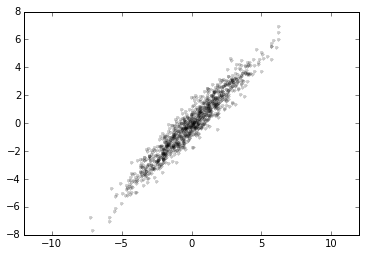

In [189]:
def plot_2D_Gaussian(Mu, Cov):
    print ('Covariance matrix: \n %s' % str(C))
    
    plt.subplot(121)  # Just draw shitloads of samples
    x = rng.multivariate_normal(Mu, Cov, (1000))
    plt.plot(x[:,0], x[:,1],'.k',alpha=.2)
    plt.axis('equal')

    
    plt.subplot(122)  # plot the surface
    numsteps = 300
    x, y =np.linspace(-10,10,numsteps), np.linspace(-10,10,numsteps)
    X = np.zeros(shape=[2,numsteps,numsteps])
    X[0], X[1] = np.meshgrid(x, y, sparse=False, indexing='ij')
    invC = np.linalg.inv(Cov)
    invCX = np.tensordot(invC, X, axes=1)
    z = np.sum(X * invCX,0)
    z = np.exp(-0.5 * z)
    plt.contourf(x,y,z, cmap='jet')
    plt.axis('equal')

Covariance matrix: 
 [[4 3]
 [3 4]]


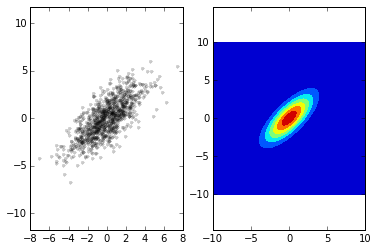

In [190]:
C = np.array([[4,3],[3,4]])
Mean = np.array([0.0,0.0])
plot_2D_Gaussian(Mean, C)

In [179]:
mean = 3 * rng.normal(0.0,1.0,(D,K))   # the centers
variance = 0.1 + 1.0*rng.random((D,K)) # note the min, max for variances
prior = 0.2 + 0.8*rng.random((1,K))    # mixing coefficients
prior = prior / np.sum(prior)             # normalisation

[[ 0.75522447 -0.91567213]
 [-0.91567213  0.74618921]]
[[ 0.75522447 -0.91567213]
 [-0.91567213  0.74618921]]
[[ 0.29379812  0.76599595]
 [ 0.76599595  0.36280538]]
[[ 0.13098023  0.88615322]
 [ 0.88615322  0.30462525]]
[[ 0.13098023  0.88615322]
 [ 0.88615322  0.30462525]]
[[ 0.35790564  0.59503435]
 [ 0.59503435  0.37205952]]
[[ 0.13098023  0.88615322]
 [ 0.88615322  0.30462525]]
[[ 0.35790564  0.59503435]
 [ 0.59503435  0.37205952]]
[[ 0.35790564  0.59503435]
 [ 0.59503435  0.37205952]]
[[ 0.75522447 -0.91567213]
 [-0.91567213  0.74618921]]


/home/marcus/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: covariance is not positive-semidefinite.


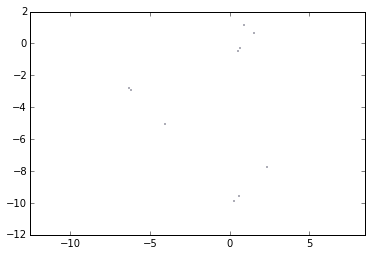

In [79]:
covariance = []
center = []
for k in range(K):
    center.append(3 * rng.normal(0.0,1.0,(D)))
    c = 0.1 + 1.0*rng.random((D,D))
    c[1,0] = rng.normal(0.0,1.0)
    c[0,1] = c[1,0] #symmetric
    covariance.append(c)

# generate samples from this mixture of Gaussians
data = pl.zeros((N,D))
for i in range(N):
    # choose a component
    j = np.sum(rng.random() > np.cumsum(prior))
    # Now choose a data point using that component of the mixture
    print (covariance[j])
    x,y = rng.multivariate_normal(center[j],covariance[j],1).T
    data[i,0] = x
    data[i,1] = y
    #for d in range(D):
    #    data[i,d] = transpose(mean)[j,d] + sqrt(variance[d,j]) * rng.normal(0.0,1.0)

# show the samples as a scatter plot
pl.scatter(data[:,0], data[:,1], marker='o',s=.5,linewidths=None,alpha=0.5)
pl.axis('equal')    
pl.draw()

Save it as a PNG file, just for kicks.

In [17]:
out_imagename = out_stem+'.png'
pl.savefig(out_imagename)
print 'saved image ',out_imagename

saved image  test-MoG.png


Now write a datafile consisting of a matrix, in which each row is a
training item. Ground truth is lost in this file: the true class is not
written, just the vector...

In [18]:
# write the samples to a file
np.savetxt(out_file, data, fmt="%12.6G",)
print 'wrote data file ',out_file

wrote data file  test-MoG.csv
